In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
allFacilities = pd.read_csv("output/describeNetwork.csv", dtype={'primary_naics': object})
naics = pd.read_csv("data/naics.csv", dtype={'2012 NAICS US Code': object})

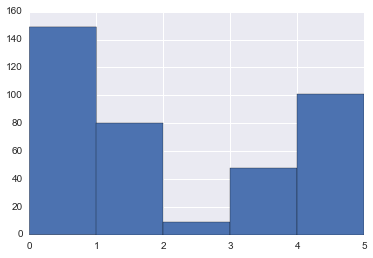

In [4]:
# Count total facilities per community
allFacilities['Community'].hist(bins=[0,1,2,3,4,5])

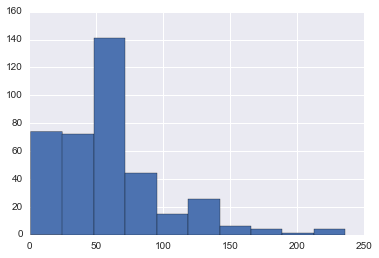

In [5]:
allFacilities['Degrees'].hist()

In [6]:
naics = naics.drop(naics.columns[[0,3,4]], axis=1)
naics.columns = ["naics", "industry"]

In [7]:
naics[naics['naics'].str.len()==6]

,naics,industry
5,111110,Soybean Farming
7,111120,Oilseed (except Soybean) Farming
9,111130,Dry Pea and Bean Farming
11,111140,Wheat Farming
13,111150,Corn Farming
15,111160,Rice Farming
17,111191,Oilseed and Grain Combination Farming
18,111199,All Other Grain Farming
21,111211,Potato Farming
22,111219,Other Vegetable (except Potato) and Melon Farm...


In [8]:
allFacilities = allFacilities.merge(naics, left_on=["primary_naics"], right_on="naics", how="left")
allFacilities = allFacilities.drop("naics", axis=1)

In [9]:
allFacilities.to_csv('output/facilitiesWithNaics.csv')

In [10]:
# this makes dict of DFs, which are written to indivual .csv files
communities = defaultdict(dict)

for i in allFacilities['Community'].unique():
    commData = allFacilities[allFacilities['Community']==i]
    communities[i]['ungroupedData'] = commData
    industries = commData.groupby(['primary_naics', 'industry']).size().order(ascending=False)
    industries = industries.reset_index()
    industries = industries.rename(columns = {0:'countPerComm'})
    industries['percentPerComm'] = (industries['countPerComm'] / len(commData))*100
    communities[i]['groupedData'] = industries

/Users/afair/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: FutureWarning: order is deprecated, use sort_values(...)


In [11]:
for i in communities:
    communities[i]['groupedData'].to_csv('output/community{}.csv'.format(i))

In [12]:
# this does pretty much same as above, except writes to one master DF and .csv rather than separate files
commDict = {}

for i in allFacilities['Community'].unique():
    commData = allFacilities[allFacilities['Community']==i]
    industries = commData.groupby(['primary_naics', 'industry']).size().order(ascending=False)
    industries = industries.reset_index()
    industries = industries.rename(columns = {0:'countPerComm'})
    industries['percentPerComm'] = (industries['countPerComm'] / len(commData))*100
    industries['community'] = i
    commDict[i] = industries

/Users/afair/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: FutureWarning: order is deprecated, use sort_values(...)


In [13]:
commDF = pd.concat([commDict[f] for f in commDict])
cols = commDF.columns.tolist()
cols = cols[-1:] + cols[:-1]
commDF = commDF[cols]
commDF = commDF.reset_index(drop=True)

In [14]:
commDF.to_csv('output/allCommunities.csv')

In [15]:
# print top n industries for each community
n = 3
commDF.groupby('community').head(n)

,community,primary_naics,industry,countPerComm,percentPerComm
0,0,221112,Fossil Fuel Electric Power Generation,13,8.724832
1,0,325180,Other Basic Inorganic Chemical Manufacturing,10,6.711409
2,0,332813,"Electroplating, Plating, Polishing, Anodizing,...",7,4.697987
75,1,424710,Petroleum Bulk Stations and Terminals,26,32.500000
76,1,325211,Plastics Material and Resin Manufacturing,5,6.250000
77,1,493190,Other Warehousing and Storage,4,5.000000
108,2,326199,All Other Plastics Product Manufacturing,6,66.666667
109,2,336112,Light Truck and Utility Vehicle Manufacturing,1,11.111111
110,2,326130,"Laminated Plastics Plate, Sheet (except Packag...",1,11.111111
112,3,324121,Asphalt Paving Mixture and Block Manufacturing,14,29.166667


In [17]:
# print bottom n industries for each community
n = 3
commDF.groupby('community').tail(n)

,community,primary_naics,industry,countPerComm,percentPerComm
72,0,331410,Nonferrous Metal (except Aluminum) Smelting an...,1,0.671141
73,0,327993,Mineral Wool Manufacturing,1,0.671141
74,0,212399,All Other Nonmetallic Mineral Mining,1,0.671141
105,1,335999,All Other Miscellaneous Electrical Equipment a...,1,1.250000
106,1,337215,"Showcase, Partition, Shelving, and Locker Manu...",1,1.250000
107,1,326220,Rubber and Plastics Hoses and Belting Manufact...,1,1.250000
109,2,336112,Light Truck and Utility Vehicle Manufacturing,1,11.111111
110,2,326130,"Laminated Plastics Plate, Sheet (except Packag...",1,11.111111
111,2,325991,Custom Compounding of Purchased Resins,1,11.111111
124,3,322299,All Other Converted Paper Product Manufacturing,1,2.083333


In [18]:
# print all industries for each community
allCommunities = commDF.groupby('community').apply(lambda x: x)
allCommunities[allCommunities['community'] == 1]  # Toggle through the communities

,community,primary_naics,industry,countPerComm,percentPerComm
75,1,424710,Petroleum Bulk Stations and Terminals,26,32.50
76,1,325211,Plastics Material and Resin Manufacturing,5,6.25
77,1,493190,Other Warehousing and Storage,4,5.00
78,1,221112,Fossil Fuel Electric Power Generation,4,5.00
79,1,326150,Urethane and Other Foam Product (except Polyst...,3,3.75
80,1,325412,Pharmaceutical Preparation Manufacturing,3,3.75
81,1,325510,Paint and Coating Manufacturing,3,3.75
82,1,311514,"Dry, Condensed, and Evaporated Dairy Product M...",2,2.50
83,1,313320,Fabric Coating Mills,2,2.50
84,1,322220,Paper Bag and Coated and Treated Paper Manufac...,2,2.50


In [23]:
# # change community! (0-5)
# community = 0

# colsToDrop = ['Unnamed: 0','primary_naics', 'Betweeness', 'Closeness', 'Eigenvector']
# community_table = allFacilities[allFacilities['Community']==community].drop(colsToDrop, axis=1)
# community_table.columns = map(str.lower, community_table.columns)
# community_table